In [170]:
#Cody Rorick
#purpose: To find the return on covered calls 
#inputs: Yahoo finance data
#outputs: plot of covered call return on given stock depending on how far out you sell

In [268]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [296]:
def getData(symbol):

    tk = yf.Ticker(symbol)
    # Expiration dates
    exps = tk.options
    #creating df for options
    options = pd.DataFrame()
    
    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps[3:8]:
        opt = tk.option_chain(e).calls
        opt['expirationDate'] = e
        options = pd.concat([options,opt], ignore_index=True)
        
    #getting the average strike price
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask']) / 2 
    
    # Drop unnecessary columns
    options = options.drop(columns = ['inTheMoney', 'contractSymbol', 'volume', 'openInterest', 'impliedVolatility', 'contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate', 'lastPrice'])
    
    #adding ticker and current stock price to dataframe
    options['symbol'] = symbol
    options['current price'] = tk.info['currentPrice']
    
    return options

In [297]:
def strikeFinder(df, otm_percent_list):
    currentPrice = df.loc[0, 'current price']
    dates = set(df['expirationDate'])
    optionsData2 = pd.DataFrame()
    for percent in otm_percent_list:
        desiredStrikePrice = currentPrice * (1 + (percent/100))
        for date in dates:
            StrikesOnDate = list(df.loc[df['expirationDate'] == date, 'strike'])
            closestDesiredStrike = min(StrikesOnDate, key=lambda x:abs(x-desiredStrikePrice))
            df.loc[(df['expirationDate'] == date) & (df['strike'] == closestDesiredStrike), 'desired_strike_%otm'] = round((1 + (percent/100))*100 - 100, 0)
            optionsData2 = pd.concat([optionsData2, df.loc[(df['expirationDate'] == date) & (df['strike'] == closestDesiredStrike), :]])
    optionsData2 = optionsData2.reset_index(drop = True)
    return optionsData2

In [298]:
def strikeBarPlotter(df):
    
    df = df.sort_values(by=['expirationDate', 'desired_strike_%otm'])
    X = list(set(df['expirationDate']))
    X.sort()
    X_axis = np.arange(len(X))
    width = 0.15
    OTM_percentages = list(set(df['desired_strike_%otm']))
    OTM_percentages.sort()
    vals = []
    bars = []

    for percent in OTM_percentages:
        vals.append(list(df.loc[df['desired_strike_%otm'] == percent, '%_return'].values))
    
    for i in range(0, len(vals)):
        bars.append(plt.bar(X_axis + i*width, vals[i], width, color = str((1/(i+1.125)))))
    
    plt.xlabel('DATE') 
    plt.ylabel('% RETURN') 
    plt.title(f"Covered Calls for: {df.loc[0, 'symbol']}, Capital Required: ${df.loc[0, 'current price'] * 100}")
    
    
    plt.xticks(X_axis+width, X) 
    plt.legend(bars, OTM_percentages, title = '% OTM') 
    plt.show() 

what symbol are you interested in?:pltr


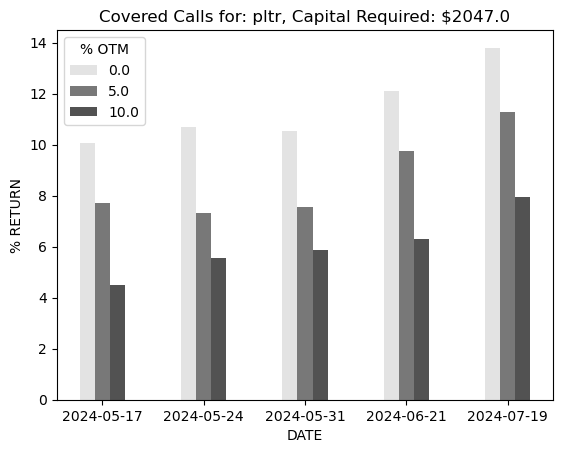

In [299]:
symbol = input('what symbol are you interested in?:')
options = strikeFinder(getData(symbol), [0, 5, 10])
options['%_return'] = (options['mark']/options['current price']) * 100

strikeBarPlotter(options)

In [300]:
options.sort_values(by=['expirationDate', 'desired_strike_%otm'])

,strike,bid,ask,expirationDate,mark,symbol,current price,desired_strike_%otm,%_return
0,20.0,2.01,2.11,2024-05-17,2.060,pltr,20.47,0.0,10.063508
5,21.0,1.57,1.59,2024-05-17,1.580,pltr,20.47,5.0,7.718613
10,23.0,0.90,0.94,2024-05-17,0.920,pltr,20.47,10.0,4.494382
2,20.0,2.09,2.28,2024-05-24,2.185,pltr,20.47,0.0,10.674157
7,21.5,1.44,1.55,2024-05-24,1.495,pltr,20.47,5.0,7.303371
12,22.5,1.02,1.26,2024-05-24,1.140,pltr,20.47,10.0,5.569126
1,20.0,2.08,2.23,2024-05-31,2.155,pltr,20.47,0.0,10.527601
6,21.5,1.51,1.58,2024-05-31,1.545,pltr,20.47,5.0,7.547631
11,22.5,1.18,1.23,2024-05-31,1.205,pltr,20.47,10.0,5.886663
3,20.0,2.42,2.53,2024-06-21,2.475,pltr,20.47,0.0,12.090865
